In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import sys
import json

from datetime import timedelta, date, datetime
from mpl_toolkits.mplot3d import Axes3D
# from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
# from kneed import KneeLocator
from sklearn.cluster import KMeans
# from light_famd import MCA,FAMD
from scipy import stats

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
path = os.getcwd() + '/DataForClusterization.csv'
data = pd.read_csv(path)
data

,Unnamed: 0,Date,Week_Day,Month,User_Activity,Food_Count,total_calories,total_carbs,total_fat,total_protein,...,goal_sodium,goal_sugar,goal_fiber,diff_calories,diff_carbs,diff_fat,diff_protein,diff_sodium,diff_sugar,diff_fiber
0,0,2014-09-14,Sunday,September,56,164,73701.0,6196.0,2877.0,3379.0,...,68500.0,1858.0,1047.0,-26507.0,-2862.0,-542.0,-2951.0,-9608.0,57.0,-548.0
1,1,2014-09-15,Monday,September,280,909,405220.0,39757.0,15061.0,22073.0,...,406900.0,11154.0,3874.0,-120875.0,-12829.0,-3024.0,-11912.0,-49466.0,-365.0,-1761.0
2,2,2014-09-16,Tuesday,September,279,924,400237.0,40230.0,14044.0,22207.0,...,403500.0,11127.0,3857.0,-116354.0,-12571.0,-3564.0,-10617.0,-66455.0,-1611.0,-1592.0
3,3,2014-09-17,Wednesday,September,274,861,402535.0,39267.0,14585.0,21971.0,...,387400.0,11141.0,3876.0,-107952.0,-12238.0,-2827.0,-10776.0,-59776.0,-1651.0,-1630.0
4,4,2014-09-18,Thursday,September,382,1342,541442.0,53949.0,19930.0,29552.0,...,559100.0,14571.0,5478.0,-143172.0,-14643.0,-4089.0,-13986.0,-91288.0,-2097.0,-1968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,2015-04-05,Sunday,April,515,1766,710073.0,66273.0,26095.0,34380.0,...,796050.0,20594.0,6249.0,-215289.0,-29321.0,-4724.0,-26011.0,-164363.0,-6475.0,-3294.0
204,204,2015-04-06,Monday,April,574,1940,745455.0,74221.0,27560.0,42725.0,...,896850.0,23351.0,7116.0,-307397.0,-35018.0,-7303.0,-26028.0,-214917.0,-7051.0,-2948.0
205,205,2015-04-07,Tuesday,April,351,1276,453123.0,45123.0,17046.0,26786.0,...,559550.0,14365.0,4147.0,-178125.0,-21172.0,-4245.0,-14094.0,-137787.0,-3938.0,-1428.0
206,206,2015-04-08,Wednesday,April,132,480,153984.0,14922.0,6191.0,8971.0,...,224400.0,5382.0,1561.0,-86861.0,-9824.0,-2090.0,-6406.0,-69690.0,-2176.0,-555.0


Text(0.5, 1.0, 'Frequency of Days')

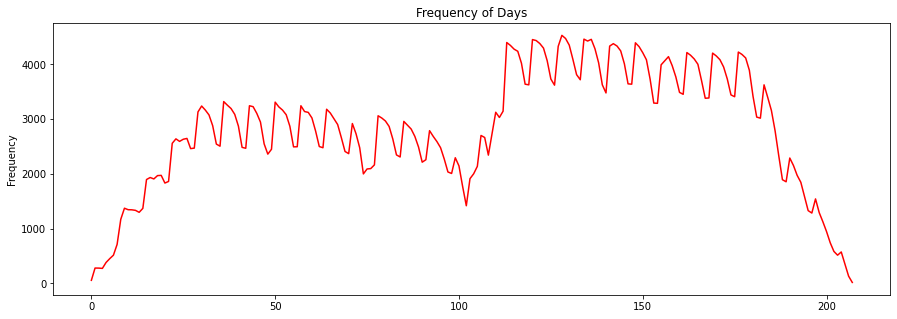

In [20]:
plt.figure(figsize=(15,5))
plt.plot(data['User_Activity'], color='red')
plt.ylabel('Frequency')
plt.title('Frequency of Days')